# 1. Pre-procesamiento de Datos:

Cargando el dataset e importando las librerias necesarias:

In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv('listings_c.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25425 entries, 0 to 25424
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25425 non-null  int64  
 1   listing_url                                   25425 non-null  object 
 2   scrape_id                                     25425 non-null  int64  
 3   last_scraped                                  25425 non-null  object 
 4   source                                        25425 non-null  object 
 5   name                                          25425 non-null  object 
 6   description                                   24518 non-null  object 
 7   neighborhood_overview                         15898 non-null  object 
 8   picture_url                                   25425 non-null  object 
 9   host_id                                       25425 non-null 

## 1.1 Limpieza de datos y seleccion de caracteristicas
Limpiamos los datos manejando los valores faltantes, eliminando las columnas irrelevantes y convirtiendo los tipos de datos si es necesario.

Seleccionando caracteristicas relevantes para el modelo de predicción de precios: por ejmplo, property_type, room_type, neighborhood, bedrooms, amenities y precio.

In [14]:
selected_features = ['property_type', 'room_type', 'neighbourhood_cleansed', 'bedrooms', 'amenities', 'price']
selected_data = df[selected_features]
selected_data.head(5)

,property_type,room_type,neighbourhood_cleansed,bedrooms,amenities,price
0,Entire villa,Entire home/apt,Cuajimalpa de Morelos,1.0,"[""Pocket wifi"", ""Kitchen"", ""Bed linens"", ""Indo...","$3,428.00"
1,Entire home,Entire home/apt,Cuauhtémoc,5.0,"[""Washer"", ""Microwave"", ""Hangers"", ""Hair dryer...","$18,000.00"
2,Shared room in rental unit,Shared room,Cuauhtémoc,NaN,"[""Wifi"", ""Washer"", ""Breakfast"", ""Kitchen"", ""TV...","$1,708.00"
3,Entire condo,Entire home/apt,Cuauhtémoc,1.0,"[""Microwave"", ""Stove"", ""Hangers"", ""Essentials""...",$651.00
4,Entire condo,Entire home/apt,Cuauhtémoc,1.0,"[""Hangers"", ""Hair dryer"", ""Body soap"", ""Essent...","$1,450.00"


Obtenemos los vecindarios involucrado en el dataset

In [15]:
print(selected_data['neighbourhood_cleansed'].unique())

['Cuajimalpa de Morelos' 'Cuauhtémoc' 'Álvaro Obregón' 'Miguel Hidalgo'
 'Coyoacán' 'Venustiano Carranza' 'Benito Juárez' 'La Magdalena Contreras'
 'Tlalpan' 'Iztacalco' 'Iztapalapa' 'Gustavo A. Madero' 'Xochimilco'
 'Azcapotzalco' 'Tláhuac' 'Milpa Alta']


Obtenemos la info de nuestro nuevo dataset nombrado selected_data

In [16]:
print(selected_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25425 entries, 0 to 25424
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           25425 non-null  object 
 1   room_type               25425 non-null  object 
 2   neighbourhood_cleansed  25425 non-null  object 
 3   bedrooms                18063 non-null  float64
 4   amenities               25425 non-null  object 
 5   price                   25425 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.2+ MB
None


Obtenemos medidas estadisticas de las variables numericas

In [17]:
selected_data.describe()

,bedrooms
count,18063.000000
mean,1.733544
std,1.274446
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,50.000000


Buscamos valores faltantes en la variable bedrooms

In [18]:
selected_data['bedrooms'].value_counts(dropna=False)

1.0     8944
NaN     7362
2.0     6690
3.0     1775
4.0      347
5.0      127
6.0       64
7.0       42
8.0       24
10.0      15
9.0       11
27.0       5
11.0       4
16.0       3
50.0       3
12.0       3
14.0       1
15.0       1
20.0       1
13.0       1
24.0       1
23.0       1
Name: bedrooms, dtype: int64

Llenamos los campos faltantes con la media de la columna

Validamos nuevamente si aún existen valores NaN

In [20]:
selected_data['bedrooms'].fillna(int(selected_data['bedrooms'].mean()), inplace=True)

C:\Users\aches\AppData\Local\Temp\ipykernel_60308\1317121218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['bedrooms'].fillna(int(selected_data['bedrooms'].mean()), inplace=True)


In [21]:
print(selected_data['bedrooms'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 25425 entries, 0 to 25424
Series name: bedrooms
Non-Null Count  Dtype  
--------------  -----  
25425 non-null  float64
dtypes: float64(1)
memory usage: 198.8 KB
None


Realizamos la conversión a entero en la columna bedrooms por contener valores enteros

In [22]:
selected_data['bedrooms'] = selected_data['bedrooms'].astype('Int64')

C:\Users\aches\AppData\Local\Temp\ipykernel_60308\1483658691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['bedrooms'] = selected_data['bedrooms'].astype('Int64')


In [23]:
selected_data.dtypes

property_type             object
room_type                 object
neighbourhood_cleansed    object
bedrooms                   Int64
amenities                 object
price                     object
dtype: object

Procesamos la variable precio: remplazamos el caracter $ y , por vacio para no alterar los resultados, además cambiamos tratamos los campos vacios y Nan Values y cambiamos el tipo de dato

In [24]:
selected_data['price'] = selected_data['price'].str.replace('$', '').str.replace(',', '')
selected_data.head(5)

C:\Users\aches\AppData\Local\Temp\ipykernel_60308\1790665288.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  selected_data['price'] = selected_data['price'].str.replace('$', '').str.replace(',', '')
C:\Users\aches\AppData\Local\Temp\ipykernel_60308\1790665288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['price'] = selected_data['price'].str.replace('$', '').str.replace(',', '')


,property_type,room_type,neighbourhood_cleansed,bedrooms,amenities,price
0,Entire villa,Entire home/apt,Cuajimalpa de Morelos,1,"[""Pocket wifi"", ""Kitchen"", ""Bed linens"", ""Indo...",3428.00
1,Entire home,Entire home/apt,Cuauhtémoc,5,"[""Washer"", ""Microwave"", ""Hangers"", ""Hair dryer...",18000.00
2,Shared room in rental unit,Shared room,Cuauhtémoc,1,"[""Wifi"", ""Washer"", ""Breakfast"", ""Kitchen"", ""TV...",1708.00
3,Entire condo,Entire home/apt,Cuauhtémoc,1,"[""Microwave"", ""Stove"", ""Hangers"", ""Essentials""...",651.00
4,Entire condo,Entire home/apt,Cuauhtémoc,1,"[""Hangers"", ""Hair dryer"", ""Body soap"", ""Essent...",1450.00


In [25]:
selected_data['price'] = selected_data['price'].str.strip()

# Replace empty values with NaN (missing value)
selected_data['price'] = selected_data['price'].replace('', np.nan)

# Convert the column to numeric type, treating the empty values as NaN
selected_data['price'] = pd.to_numeric(selected_data['price'], errors='coerce')

# Convert the column to integers, while ignoring NaN values
selected_data['price'] = selected_data['price'].astype('Int64')
selected_data = selected_data.dropna()
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25425 entries, 0 to 25424
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   property_type           25425 non-null  object
 1   room_type               25425 non-null  object
 2   neighbourhood_cleansed  25425 non-null  object
 3   bedrooms                25425 non-null  Int64 
 4   amenities               25425 non-null  object
 5   price                   25425 non-null  Int64 
dtypes: Int64(2), object(4)
memory usage: 1.2+ MB


C:\Users\aches\AppData\Local\Temp\ipykernel_60308\2916068634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['price'] = selected_data['price'].str.strip()
C:\Users\aches\AppData\Local\Temp\ipykernel_60308\2916068634.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['price'] = selected_data['price'].replace('', np.nan)
C:\Users\aches\AppData\Local\Temp\ipykernel_60308\2916068634.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Validamos nuevamente las medidas de tendencia central

In [28]:
selected_data.describe()

,bedrooms,price
count,25425.0,25425.0
mean,1.521141,1631.505605
std,1.124539,14976.230477
min,1.0,0.0
25%,1.0,550.0
50%,1.0,921.0
75%,2.0,1497.0
max,50.0,1838000.0


Generamos un par de diagramas para validar valores atipicos en nustro dataset

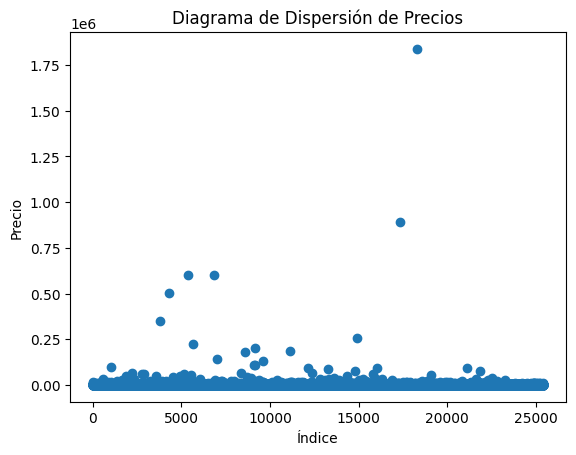

In [29]:
import matplotlib.pyplot as plt

# Crear el diagrama de dispersión
plt.scatter(selected_data.index, selected_data['price'])

# Etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Precio')
plt.title('Diagrama de Dispersión de Precios')

# Mostrar el diagrama
plt.show()

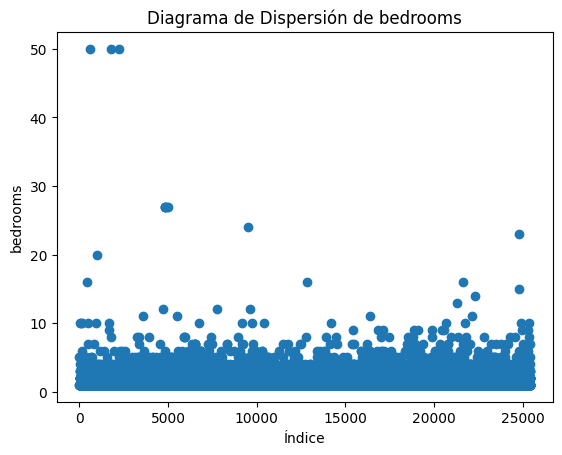

In [30]:
import matplotlib.pyplot as plt

# Crear el diagrama de dispersión
plt.scatter(selected_data.index, selected_data['bedrooms'])

# Etiquetas y título
plt.xlabel('Índice')
plt.ylabel('bedrooms')
plt.title('Diagrama de Dispersión de bedrooms')

# Mostrar el diagrama
plt.show()

<AxesSubplot: >

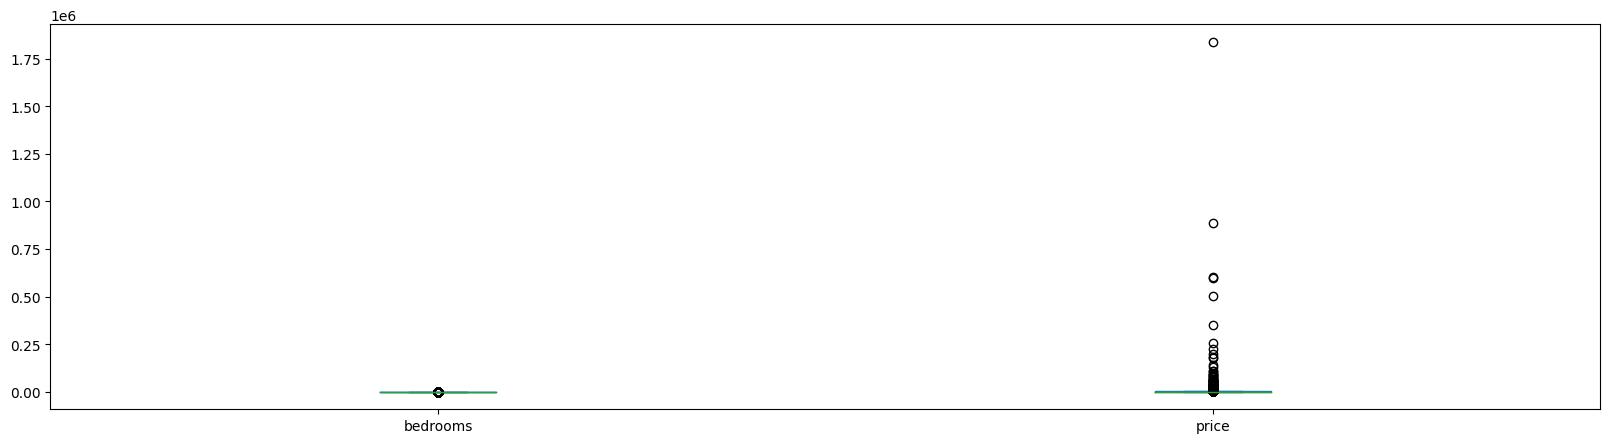

In [31]:
selected_data.plot.box(figsize=(20,5), grid = False)

Realizamos una busqueda de valores atipicos de la variable Price

In [32]:
selected_data[(selected_data['price'] <= 100) | (selected_data['price'] >= 5000)].sort_values(by='price', ascending=True)

,property_type,room_type,neighbourhood_cleansed,bedrooms,amenities,price
9275,Room in hotel,Hotel room,Cuauhtémoc,1,"[""32\"" TV with premium cable"", ""Onsite bar"", ""...",0
9178,Room in hotel,Hotel room,Miguel Hidalgo,1,"[""Carbon monoxide alarm"", ""Kitchen"", ""Smoke al...",0
9179,Room in bed and breakfast,Hotel room,Cuauhtémoc,1,"[""32\"" TV"", ""Toiletries"", ""Hangers"", ""Hair dry...",0
22972,Shared room in rental unit,Shared room,Cuauhtémoc,1,"[""Lockbox"", ""Kitchen"", ""Wifi"", ""Self check-in""]",10
7752,Shared room in rental unit,Shared room,Cuauhtémoc,1,"[""Refrigerator"", ""Wifi"", ""Iron"", ""Self check-i...",53
...,...,...,...,...,...,...
4332,Private room in rental unit,Private room,Cuauhtémoc,1,"[""Microwave"", ""Paid parking off premises"", ""St...",500540
5366,Private room in rental unit,Private room,Miguel Hidalgo,1,"[""Washer"", ""Private entrance"", ""Private living...",599670
6863,Entire rental unit,Entire home/apt,Cuauhtémoc,2,"[""Kitchen"", ""Iron"", ""Heating"", ""Pets allowed"",...",600780
17309,Entire condo,Entire home/apt,Miguel Hidalgo,2,"[""Washer"", ""Window guards"", ""Microwave"", ""Hang...",888888


Eliminamos los valores atipicos, procedemos con esta acción debido a la cantidad de registros obtenidos no representa un problema por el tamaño del dataset

In [33]:
selected_data = selected_data[(selected_data['price'] >= 100) & (selected_data['price'] <= 5000)]
selected_data

,property_type,room_type,neighbourhood_cleansed,bedrooms,amenities,price
0,Entire villa,Entire home/apt,Cuajimalpa de Morelos,1,"[""Pocket wifi"", ""Kitchen"", ""Bed linens"", ""Indo...",3428
2,Shared room in rental unit,Shared room,Cuauhtémoc,1,"[""Wifi"", ""Washer"", ""Breakfast"", ""Kitchen"", ""TV...",1708
3,Entire condo,Entire home/apt,Cuauhtémoc,1,"[""Microwave"", ""Stove"", ""Hangers"", ""Essentials""...",651
4,Entire condo,Entire home/apt,Cuauhtémoc,1,"[""Hangers"", ""Hair dryer"", ""Body soap"", ""Essent...",1450
6,Room in boutique hotel,Hotel room,Álvaro Obregón,1,"[""BBQ grill"", ""Shared patio or balcony"", ""Paid...",2900
...,...,...,...,...,...,...
25420,Entire rental unit,Entire home/apt,Cuauhtémoc,2,"[""Washer"", ""Window guards"", ""Microwave"", ""Priv...",1776
25421,Entire rental unit,Entire home/apt,Miguel Hidalgo,1,"[""Window guards"", ""Microwave"", ""Private entran...",2269
25422,Entire rental unit,Entire home/apt,Miguel Hidalgo,1,"[""Window guards"", ""Microwave"", ""Private entran...",2269
25423,Entire rental unit,Entire home/apt,Miguel Hidalgo,1,"[""Window guards"", ""Microwave"", ""Private entran...",2557


In [34]:
selected_data[selected_data['bedrooms'] >= 10].sort_values(by='bedrooms', ascending=True)

,property_type,room_type,neighbourhood_cleansed,bedrooms,amenities,price
38,Entire home,Entire home/apt,Cuauhtémoc,10,"[""Washer"", ""City skyline view"", ""Microwave"", ""...",2394
9166,Private room in guesthouse,Private room,Coyoacán,10,"[""Wifi"", ""Washer"", ""Private entrance"", ""Hanger...",300
6729,Private room in serviced apartment,Private room,Coyoacán,10,"[""Washer"", ""Microwave"", ""Private entrance"", ""S...",300
1687,Private room in home,Private room,Tlalpan,10,"[""Kitchen"", ""Iron"", ""Washer"", ""Fire extinguish...",235
25351,Entire home,Entire home/apt,Miguel Hidalgo,10,"[""Washer"", ""Microwave"", ""Private entrance"", ""B...",3000
161,Entire home,Entire home/apt,Cuauhtémoc,10,"[""Washer"", ""City skyline view"", ""Microwave"", ""...",2394
86,Entire home,Entire home/apt,Cuauhtémoc,10,"[""Washer"", ""City skyline view"", ""Microwave"", ""...",2394
488,Entire guesthouse,Entire home/apt,Venustiano Carranza,10,"[""Kitchen"", ""Bed linens"", ""Iron"", ""Washer"", ""P...",720
7750,Entire rental unit,Entire home/apt,Iztapalapa,12,"[""Kitchen"", ""Iron"", ""Fire extinguisher"", ""Hot ...",3600
24784,Room in hotel,Private room,Cuauhtémoc,15,"[""Smoke alarm"", ""Wifi"", ""Security cameras on p...",1500


In [35]:
selected_data = selected_data[selected_data['bedrooms'] < 10]
selected_data

,property_type,room_type,neighbourhood_cleansed,bedrooms,amenities,price
0,Entire villa,Entire home/apt,Cuajimalpa de Morelos,1,"[""Pocket wifi"", ""Kitchen"", ""Bed linens"", ""Indo...",3428
2,Shared room in rental unit,Shared room,Cuauhtémoc,1,"[""Wifi"", ""Washer"", ""Breakfast"", ""Kitchen"", ""TV...",1708
3,Entire condo,Entire home/apt,Cuauhtémoc,1,"[""Microwave"", ""Stove"", ""Hangers"", ""Essentials""...",651
4,Entire condo,Entire home/apt,Cuauhtémoc,1,"[""Hangers"", ""Hair dryer"", ""Body soap"", ""Essent...",1450
6,Room in boutique hotel,Hotel room,Álvaro Obregón,1,"[""BBQ grill"", ""Shared patio or balcony"", ""Paid...",2900
...,...,...,...,...,...,...
25420,Entire rental unit,Entire home/apt,Cuauhtémoc,2,"[""Washer"", ""Window guards"", ""Microwave"", ""Priv...",1776
25421,Entire rental unit,Entire home/apt,Miguel Hidalgo,1,"[""Window guards"", ""Microwave"", ""Private entran...",2269
25422,Entire rental unit,Entire home/apt,Miguel Hidalgo,1,"[""Window guards"", ""Microwave"", ""Private entran...",2269
25423,Entire rental unit,Entire home/apt,Miguel Hidalgo,1,"[""Window guards"", ""Microwave"", ""Private entran...",2557


Volvemos a validar con un diagrama de dispersión

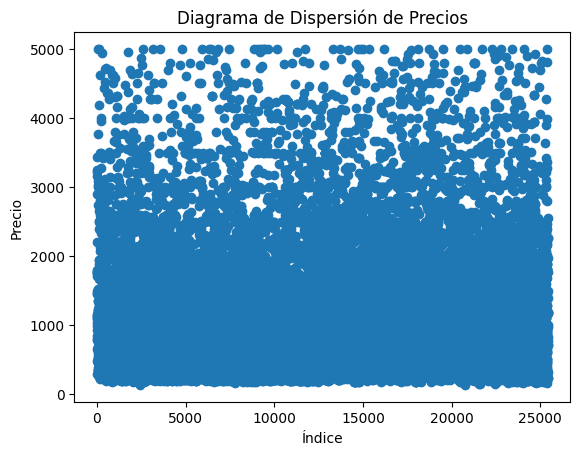

In [36]:
import matplotlib.pyplot as plt

# Crear el diagrama de dispersión
plt.scatter(selected_data.index, selected_data['price'])

# Etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Precio')
plt.title('Diagrama de Dispersión de Precios')

# Mostrar el diagrama
plt.show()

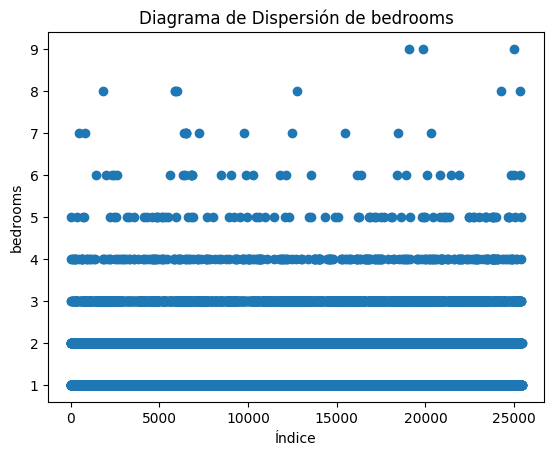

In [37]:
import matplotlib.pyplot as plt

# Crear el diagrama de dispersión
plt.scatter(selected_data.index, selected_data['bedrooms'])

# Etiquetas y título
plt.xlabel('Índice')
plt.ylabel('bedrooms')
plt.title('Diagrama de Dispersión de bedrooms')

# Mostrar el diagrama
plt.show()

In [38]:
selected_data.describe()

,bedrooms,price
count,24731.0,24731.0
mean,1.456553,1119.344547
std,0.736822,820.771885
min,1.0,135.0
25%,1.0,545.5
50%,1.0,900.0
75%,2.0,1417.0
max,9.0,5000.0


In [39]:
selected_data_cp = selected_data

Dado que las columnas property_type, room_type y neighbourhood_cleansed son de tipo categorico y los modelos de regresión no trabajan con este tipo de variables, aplicaremos una tranformación denominada Label encoding donde cada categoria se convierte en una variable discreta.

In [40]:
from sklearn.preprocessing import LabelEncoder

# Se crea una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'amenities' column using label encoding
selected_data['property_type'] = label_encoder.fit_transform(selected_data['property_type'])
selected_data['room_type'] = label_encoder.fit_transform(selected_data['room_type'])
selected_data['neighbourhood_cleansed'] = label_encoder.fit_transform(selected_data['neighbourhood_cleansed'])

selected_data

C:\Users\aches\AppData\Local\Temp\ipykernel_60308\2018387775.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['property_type'] = label_encoder.fit_transform(selected_data['property_type'])
C:\Users\aches\AppData\Local\Temp\ipykernel_60308\2018387775.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['room_type'] = label_encoder.fit_transform(selected_data['room_type'])
C:\Users\aches\AppData\Local\Temp\ipykernel_60308\2018387775.py:9: SettingWithCopyWarning: 
A value is tryin

,property_type,room_type,neighbourhood_cleansed,bedrooms,amenities,price
0,23,0,3,1,"[""Pocket wifi"", ""Kitchen"", ""Bed linens"", ""Indo...",3428
2,82,3,4,1,"[""Wifi"", ""Washer"", ""Breakfast"", ""Kitchen"", ""TV...",1708
3,9,0,4,1,"[""Microwave"", ""Stove"", ""Hangers"", ""Essentials""...",651
4,9,0,4,1,"[""Hangers"", ""Hair dryer"", ""Body soap"", ""Essent...",1450
6,65,1,15,1,"[""BBQ grill"", ""Shared patio or balcony"", ""Paid...",2900
...,...,...,...,...,...,...
25420,19,0,4,2,"[""Washer"", ""Window guards"", ""Microwave"", ""Priv...",1776
25421,19,0,9,1,"[""Window guards"", ""Microwave"", ""Private entran...",2269
25422,19,0,9,1,"[""Window guards"", ""Microwave"", ""Private entran...",2269
25423,19,0,9,1,"[""Window guards"", ""Microwave"", ""Private entran...",2557


Para la variable amenities haremos un tratamiento diferente ya que label encoder no trabaja con listas, para manejar variables categóricas con múltiples opciones (como en este caso, donde cada fila tiene una lista de elementos) utilizaremos la técnicas de codificación basada en frecuencia.

In [41]:
import pandas as pd

# Calcular la frecuencia de elementos en la columna 'amenities'
selected_data['amenities_frequency'] = selected_data['amenities'].apply(lambda x: len(eval(x)))


       property_type  room_type  neighbourhood_cleansed  bedrooms  \
0                 23          0                       3         1   
2                 82          3                       4         1   
3                  9          0                       4         1   
4                  9          0                       4         1   
6                 65          1                      15         1   
...              ...        ...                     ...       ...   
25420             19          0                       4         2   
25421             19          0                       9         1   
25422             19          0                       9         1   
25423             19          0                       9         1   
25424             19          0                       4         2   

                                               amenities  price  \
0      ["Pocket wifi", "Kitchen", "Bed linens", "Indo...   3428   
2      ["Wifi", "Washer", "Breakfast"

C:\Users\aches\AppData\Local\Temp\ipykernel_60308\2782848874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['amenities_frequency'] = selected_data['amenities'].apply(lambda x: len(eval(x)))


In [42]:
# Mostrar el DataFrame con la nueva columna de frecuencia
selected_data

,property_type,room_type,neighbourhood_cleansed,bedrooms,amenities,price,amenities_frequency
0,23,0,3,1,"[""Pocket wifi"", ""Kitchen"", ""Bed linens"", ""Indo...",3428,12
2,82,3,4,1,"[""Wifi"", ""Washer"", ""Breakfast"", ""Kitchen"", ""TV...",1708,5
3,9,0,4,1,"[""Microwave"", ""Stove"", ""Hangers"", ""Essentials""...",651,29
4,9,0,4,1,"[""Hangers"", ""Hair dryer"", ""Body soap"", ""Essent...",1450,45
6,65,1,15,1,"[""BBQ grill"", ""Shared patio or balcony"", ""Paid...",2900,38
...,...,...,...,...,...,...,...
25420,19,0,4,2,"[""Washer"", ""Window guards"", ""Microwave"", ""Priv...",1776,35
25421,19,0,9,1,"[""Window guards"", ""Microwave"", ""Private entran...",2269,35
25422,19,0,9,1,"[""Window guards"", ""Microwave"", ""Private entran...",2269,33
25423,19,0,9,1,"[""Window guards"", ""Microwave"", ""Private entran...",2557,35


In [43]:
# Eliminar la columna original 'amenities'
selected_data.drop('amenities', axis=1, inplace=True)

# Mostrar el DataFrame con las columnas codificadas
selected_data

C:\Users\aches\AppData\Local\Temp\ipykernel_60308\2010609582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.drop('amenities', axis=1, inplace=True)


,property_type,room_type,neighbourhood_cleansed,bedrooms,price,amenities_frequency
0,23,0,3,1,3428,12
2,82,3,4,1,1708,5
3,9,0,4,1,651,29
4,9,0,4,1,1450,45
6,65,1,15,1,2900,38
...,...,...,...,...,...,...
25420,19,0,4,2,1776,35
25421,19,0,9,1,2269,35
25422,19,0,9,1,2269,33
25423,19,0,9,1,2557,35


<AxesSubplot: ylabel='Frequency'>

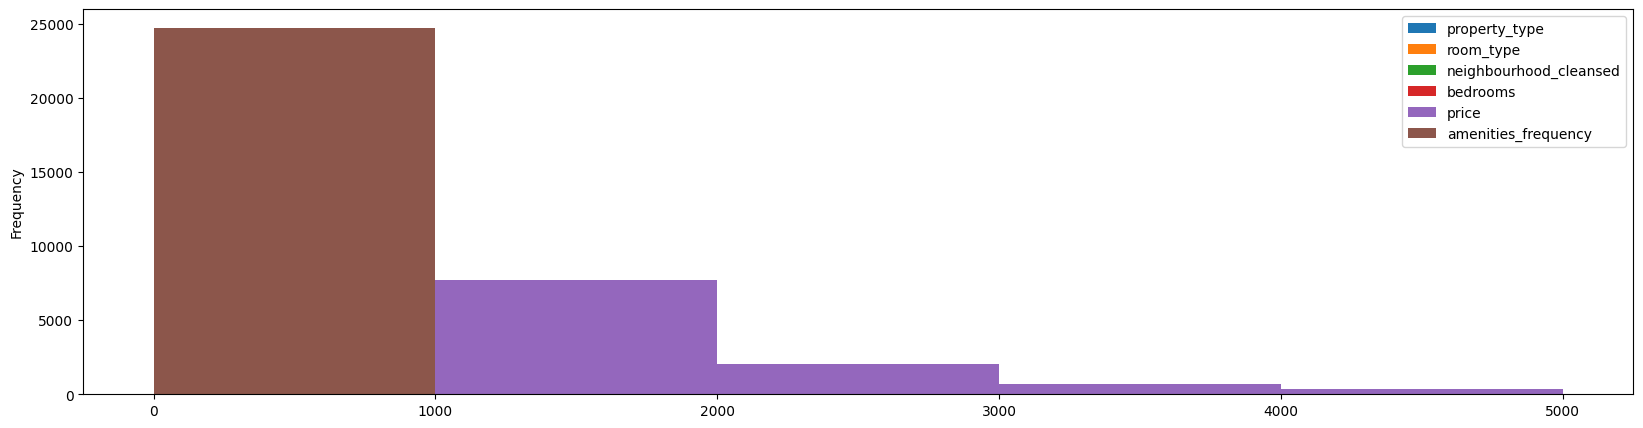

In [44]:
selected_data.plot.hist(bins=5, figsize=(20,5))

<AxesSubplot: >

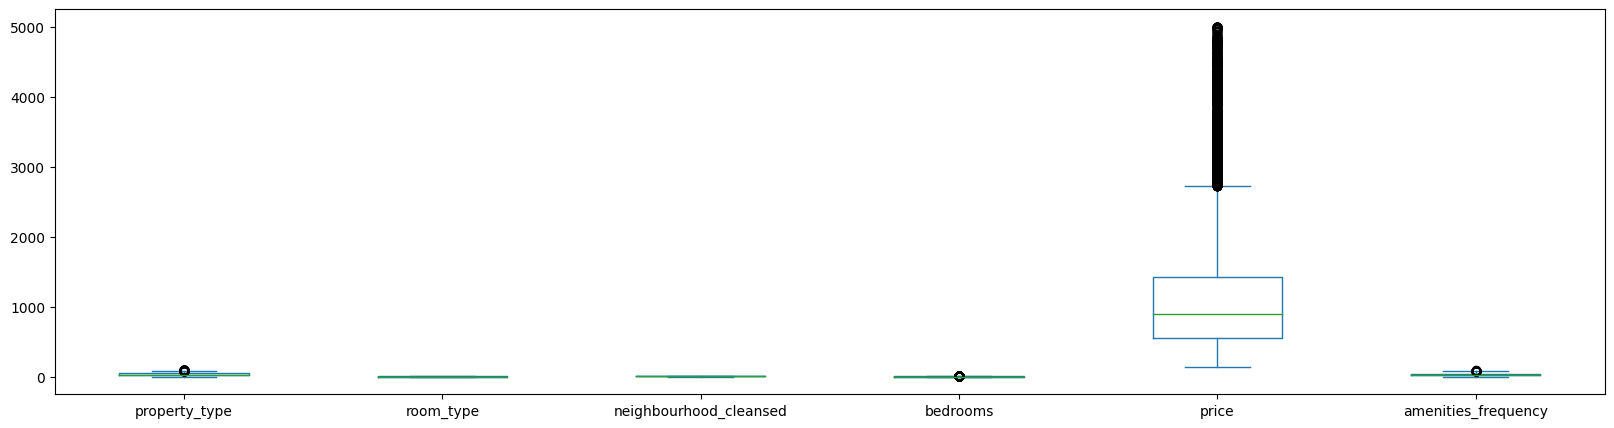

In [45]:
selected_data.plot.box(figsize=(20,5), grid = False)

4. Dividir entrenamiento y prueba: Dividir el dataset en sets de entrenamiento y prueba para evaluar el rendimiento del modelo

In [46]:
from sklearn.model_selection import train_test_split

X = selected_data.drop('price', axis=1)
y = selected_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

StandardScaler estandariza una característica restando la media y luego escalando a la varianza unitaria. La varianza unitaria significa dividir todos los valores por la desviación estándar.

In [47]:
from sklearn.preprocessing import StandardScaler

sX = StandardScaler()
X_scaler = sX.fit_transform(X)
print(X_scaler)

[[-0.29389675 -0.72861813 -0.63309595 -0.61963678 -1.22681195]
 [ 3.05513342  2.35408973 -0.36425383 -0.61963678 -1.69187151]
 [-1.08858187 -0.72861813 -0.36425383 -0.61963678 -0.09738159]
 ...
 [-0.52094964 -0.72861813  0.97995674 -0.61963678  0.16836673]
 [-0.52094964 -0.72861813  0.97995674 -0.61963678  0.30124089]
 [-0.52094964 -0.72861813 -0.36425383  0.73757136  0.89917461]]


Generamos grafico para validar los cambios en las variables

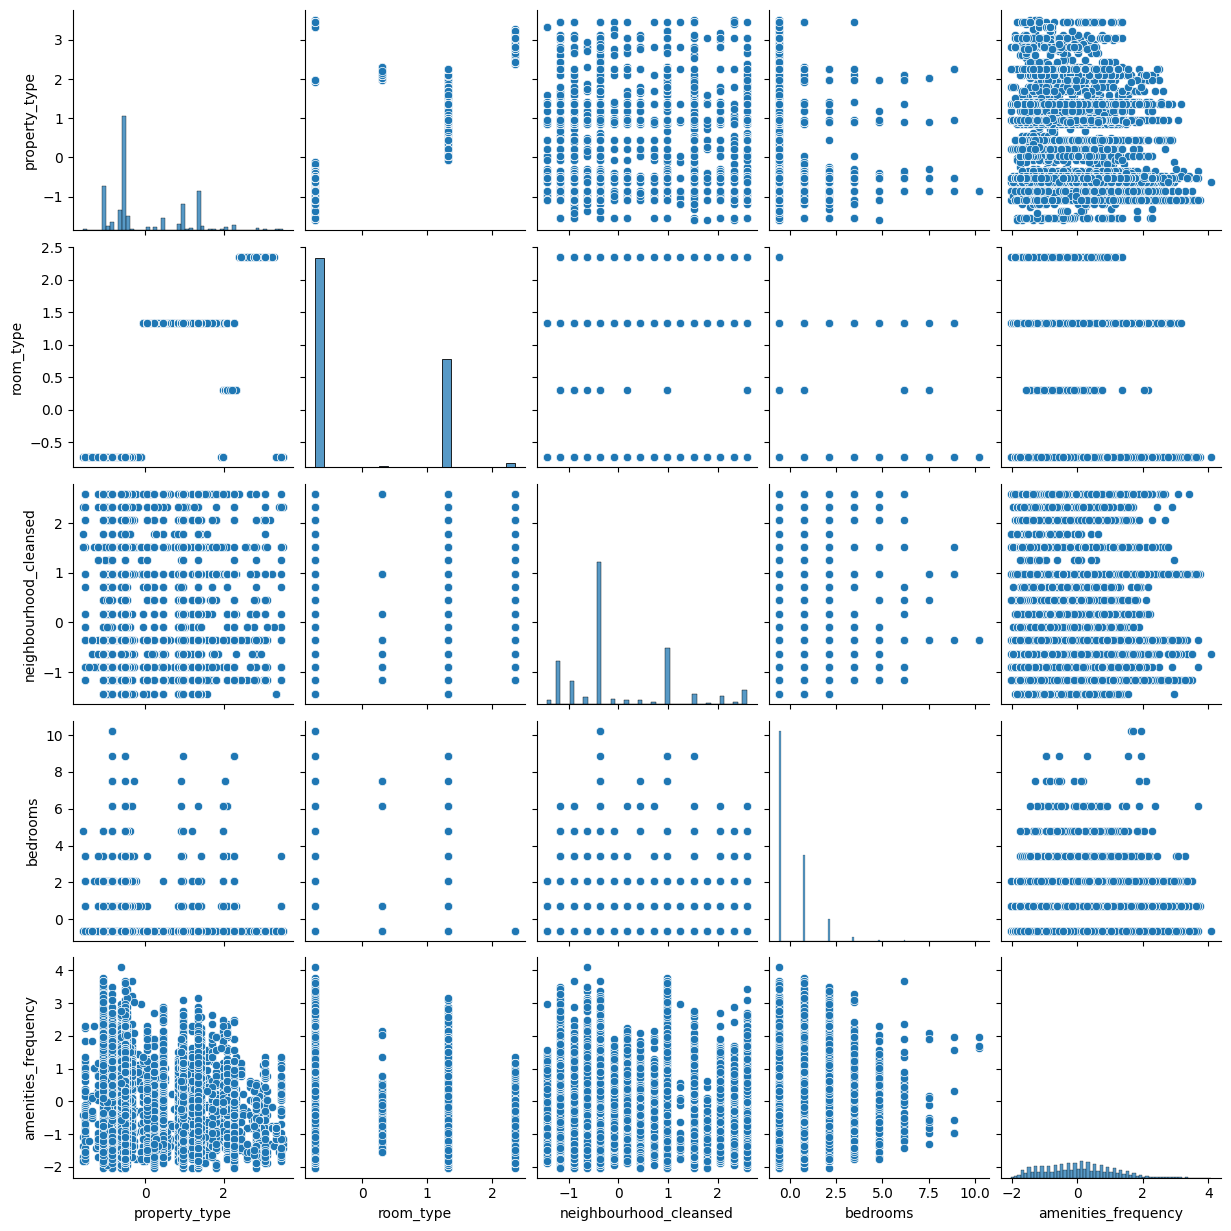

In [48]:
import seaborn as sns
sns.pairplot(pd.DataFrame(X_scaler,columns=X.columns))

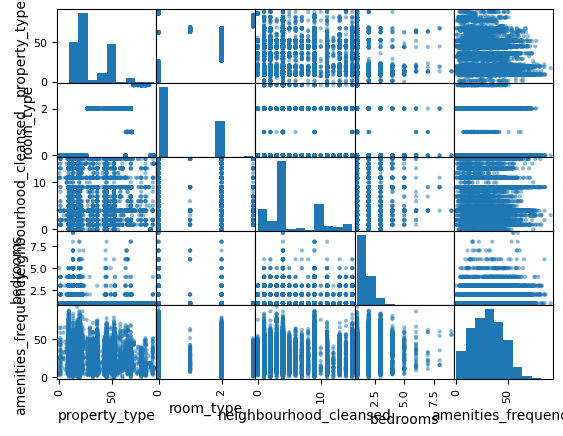

In [53]:
from pandas.plotting import scatter_matrix
scatter_matrix(X)
plt.show()

Generamos histogramas de la variable X

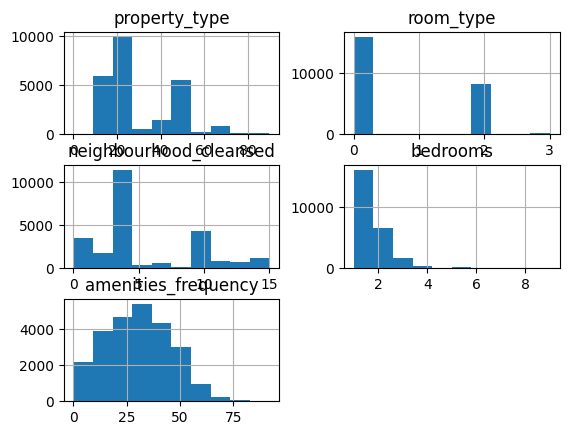

In [49]:
# histogramas
X.hist()
plt.show()

5. Model Training and Evaluation:

Entrenamos un modelo de regresión usando el dataset de entrenamiento y evaluamos el rendimiento en el dataset de prueba

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 687.9872827884002


6. Model Interpretation:

Analizando los coeficientes del modelo o la importancia de las caracteristicas para comprender que factores tienen un impacto más significativo en el precio.

In [51]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

                  Feature  Coefficient
3                bedrooms   428.610093
0           property_type     7.428964
4     amenities_frequency     6.261772
2  neighbourhood_cleansed     4.752229
1               room_type  -270.067132


In [61]:
selected_data['bedrooms'] = selected_data['bedrooms'].astype('int64')
selected_data['price'] = selected_data['price'].astype('int64')
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24731 entries, 0 to 25424
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   property_type           24731 non-null  int32
 1   room_type               24731 non-null  int32
 2   neighbourhood_cleansed  24731 non-null  int32
 3   bedrooms                24731 non-null  int64
 4   price                   24731 non-null  int64
 5   amenities_frequency     24731 non-null  int64
dtypes: int32(3), int64(3)
memory usage: 1.0 MB


C:\Users\aches\AppData\Local\Temp\ipykernel_60308\591109518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['bedrooms'] = selected_data['bedrooms'].astype('int64')
C:\Users\aches\AppData\Local\Temp\ipykernel_60308\591109518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['price'] = selected_data['price'].astype('int64')


In [54]:
#Máquina de soporte vectorial
from sklearn.svm import SVC

In [55]:
svm = SVC(C=10,kernel='rbf')

In [62]:
#Etiquetas y muestras
y = selected_data['price']
X = selected_data.drop(columns = ['price'])

In [63]:
#Pre-procesamiento
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
print(X_scaler)

[[-0.29389675 -0.72861813 -0.63309595 -0.61963678 -1.22681195]
 [ 3.05513342  2.35408973 -0.36425383 -0.61963678 -1.69187151]
 [-1.08858187 -0.72861813 -0.36425383 -0.61963678 -0.09738159]
 ...
 [-0.52094964 -0.72861813  0.97995674 -0.61963678  0.16836673]
 [-0.52094964 -0.72861813  0.97995674 -0.61963678  0.30124089]
 [-0.52094964 -0.72861813 -0.36425383  0.73757136  0.89917461]]


In [64]:
X_train, X_val, Y_train, Y_val = train_test_split(X_scaler, y, test_size=0.20, random_state=1, shuffle=True)

In [67]:
# Entrenamiento
svm.fit(X_train,Y_train)

SVC(C=10)

In [68]:
#Predicción 
y_pred_svm = svm.predict(X_val)

In [70]:
# TensorFlow y tf.keras
import tensorflow as tf
from keras import *
from sklearn.model_selection import train_test_split 

model = keras.Sequential([
                        layers.Dense(64, activation='relu', input_shape=[len(X_train[0])]), #entrada
                        layers.Dense(32, activation='relu'), #intermedia
                        layers.Dense(24, activation='relu'), #intermedia
                        layers.Dense(1,activation='tanh')]) #salida tangente hiperbólica, de la familia sigmoide
model.compile(loss='binary_crossentropy',optimizer='ADAM',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 24)                792       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 3,281
Trainable params: 3,281
Non-trainable params: 0
_________________________________________________________________


In [71]:
#entrenamiento
model.fit(X_train,Y_train,epochs=50)

Epoch 1/50
619/619 [==============================] - 2s 1ms/step - loss: -15481.0742 - accuracy: 0.0000e+00
Epoch 2/50
619/619 [==============================] - 1s 1ms/step - loss: -17054.3398 - accuracy: 0.0000e+00
Epoch 3/50
619/619 [==============================] - 1s 2ms/step - loss: -17054.3535 - accuracy: 0.0000e+00
Epoch 4/50
619/619 [==============================] - 1s 2ms/step - loss: -17054.3535 - accuracy: 0.0000e+00
Epoch 5/50
619/619 [==============================] - 1s 2ms/step - loss: -17054.3555 - accuracy: 0.0000e+00
Epoch 6/50
619/619 [==============================] - 1s 2ms/step - loss: -17054.3457 - accuracy: 0.0000e+00
Epoch 7/50
619/619 [==============================] - 1s 2ms/step - loss: -17054.3398 - accuracy: 0.0000e+00
Epoch 8/50
619/619 [==============================] - 1s 2ms/step - loss: -17054.3418 - accuracy: 0.0000e+00
Epoch 9/50
619/619 [==============================] - 1s 2ms/step - loss: -17054.3457 - accuracy: 0.0000e+00
Epoch 10/50
619/619

In [72]:
#Predicción
y_pred_dnn = np.ceil(model.predict(X_val).flatten())
#Transformar a entero las predicciones
y_pred_dnn_int = [abs(y) for y in y_pred_dnn]

155/155 [==============================] - 0s 1ms/step


In [73]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report 

In [74]:
#Reporte de clasificación svm
print(classification_report(y_pred_svm,Y_val))

              precision    recall  f1-score   support

         135       0.00      0.00      0.00         0
         137       0.00      0.00      0.00         0
         160       0.00      0.00      0.00         0
         165       0.00      0.00      0.00         0
         171       0.00      0.00      0.00         0
         172       0.00      0.00      0.00         0
         180       0.00      0.00      0.00         0
         186       0.00      0.00      0.00         0
         188       0.00      0.00      0.00         0
         189       0.00      0.00      0.00         0
         190       0.00      0.00      0.00         0
         192       0.00      0.00      0.00         1
         193       0.00      0.00      0.00         0
         194       0.00      0.00      0.00         0
         195       0.00      0.00      0.00         0
         198       0.00      0.00      0.00         0
         199       0.71      0.50      0.59        10
         200       0.00    

C:\Users\aches\anaconda3\envs\IA_2S\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aches\anaconda3\envs\IA_2S\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aches\anaconda3\envs\IA_2S\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aches\anaconda3\envs\

In [75]:
#Reporte de clasificación Red Neuronal Densa
print(classification_report(y_pred_dnn_int,Y_val))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00    4947.0
       135.0       0.00      0.00      0.00       0.0
       137.0       0.00      0.00      0.00       0.0
       160.0       0.00      0.00      0.00       0.0
       165.0       0.00      0.00      0.00       0.0
       171.0       0.00      0.00      0.00       0.0
       172.0       0.00      0.00      0.00       0.0
       180.0       0.00      0.00      0.00       0.0
       186.0       0.00      0.00      0.00       0.0
       188.0       0.00      0.00      0.00       0.0
       189.0       0.00      0.00      0.00       0.0
       190.0       0.00      0.00      0.00       0.0
       192.0       0.00      0.00      0.00       0.0
       193.0       0.00      0.00      0.00       0.0
       194.0       0.00      0.00      0.00       0.0
       195.0       0.00      0.00      0.00       0.0
       198.0       0.00      0.00      0.00       0.0
       199.0       0.00    

C:\Users\aches\anaconda3\envs\IA_2S\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aches\anaconda3\envs\IA_2S\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aches\anaconda3\envs\IA_2S\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aches\anaconda3\envs\

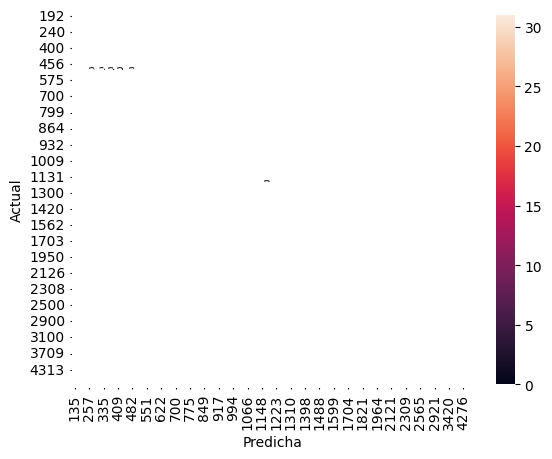

In [76]:
df_svm = pd.DataFrame([y_pred_svm,Y_val.values]).T
df_svm.columns=['y_Actual','y_Predicha']
confusion_matrix = pd.crosstab(df_svm['y_Actual'], df_svm['y_Predicha'], rownames=['Actual'], colnames=['Predicha'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

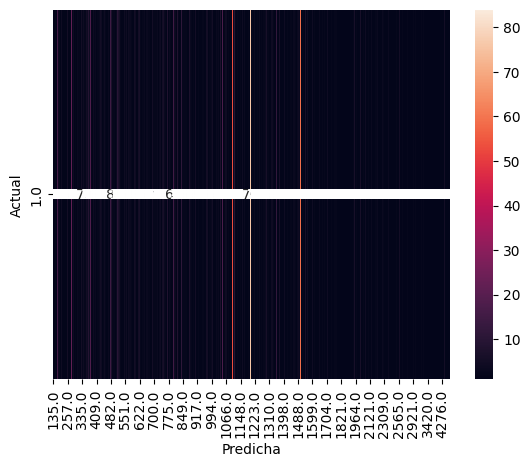

In [77]:
df_dnn = pd.DataFrame([y_pred_dnn_int,Y_val.values]).T
df_dnn.columns=['y_Actual','y_Predicha']
confusion_matrix = pd.crosstab(df_dnn['y_Actual'], df_dnn['y_Predicha'], rownames=['Actual'], colnames=['Predicha'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()